In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow version: 2.17.1
GPU is available


In [ ]:
import os

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr


<ipython-input-6-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir ='data'

In [ ]:
image_exts = ['jpeg','jpg','png','bmp']

In [ ]:
len(os.listdir(os.path.join(data_dir,'happy')))

325

In [ ]:
for i in os.listdir(data_dir):
  for j in os.listdir(os.path.join(data_dir,i)):
    image_path = os.path.join(data_dir,i,j)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/depositphotos_53010223-stock-photo-free-happy-girl-on-beach.jpg
Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data/happy/getty_152414899_97046097045006_68075.jpg
Image not in ext list data/happy/getty_478389113_970647970450091_99776.jpg
Image not in ext list data/happy/depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg
Image not in ext list data/happy/depositphotos_12221489-stock-illustration-big-smile-emoticon.jpg
Image not in ext list data/happy/UBwYhBJu_UVjV_1024.webp
Image not in ext list data/happy/YRVyt8IB_mH1B_1024.webp
Image not in ext list data/happy/transparent-happy-face-1711091557183.webp
Image not in ext list data/happy/happy-humans.webp
Image not in ext list data/sad/aaxh2l5ni.webp
Image not in ext list data/sad/sad-people-are-standing-rooftop-092116870_prevstill.jpeg
Image not in ext list data/sad/clip-art-seas-internet-scams-and-fra

In [ ]:
tf.data.Dataset?? #explains the parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 683 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch  = data_iterator.next()

In [ ]:
#Image represented a numpy arrays
batch[0].shape


(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

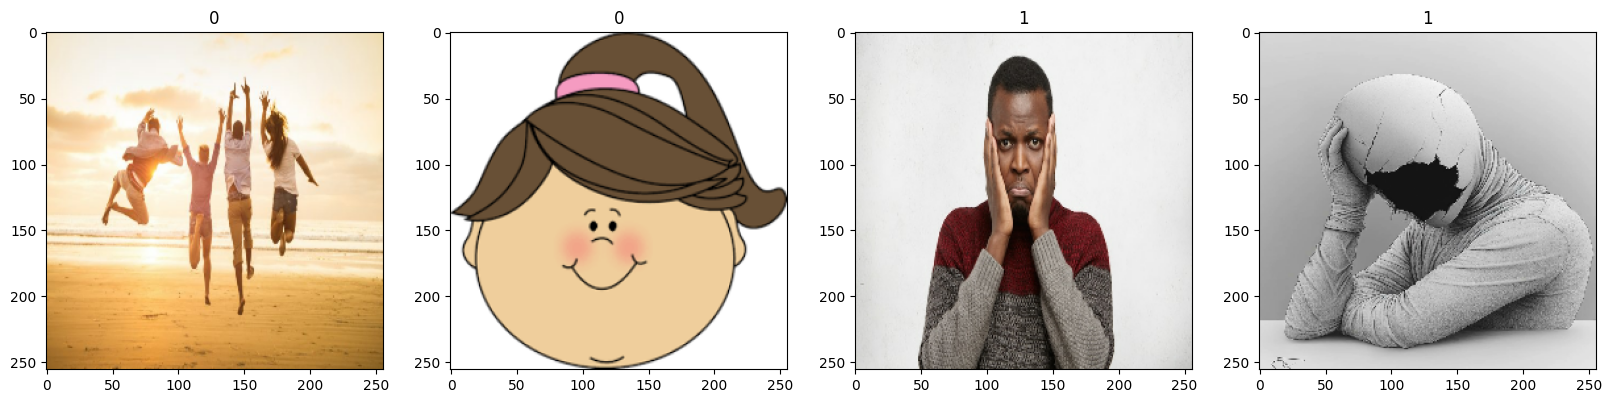

In [ ]:
#classify which is sad or happy
fig ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#1- SAD ,0- HAPPY

In [ ]:
#Data Preprocessing

In [ ]:

data = data.map(lambda x,y: (x/255,y)) #Standadization of data

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

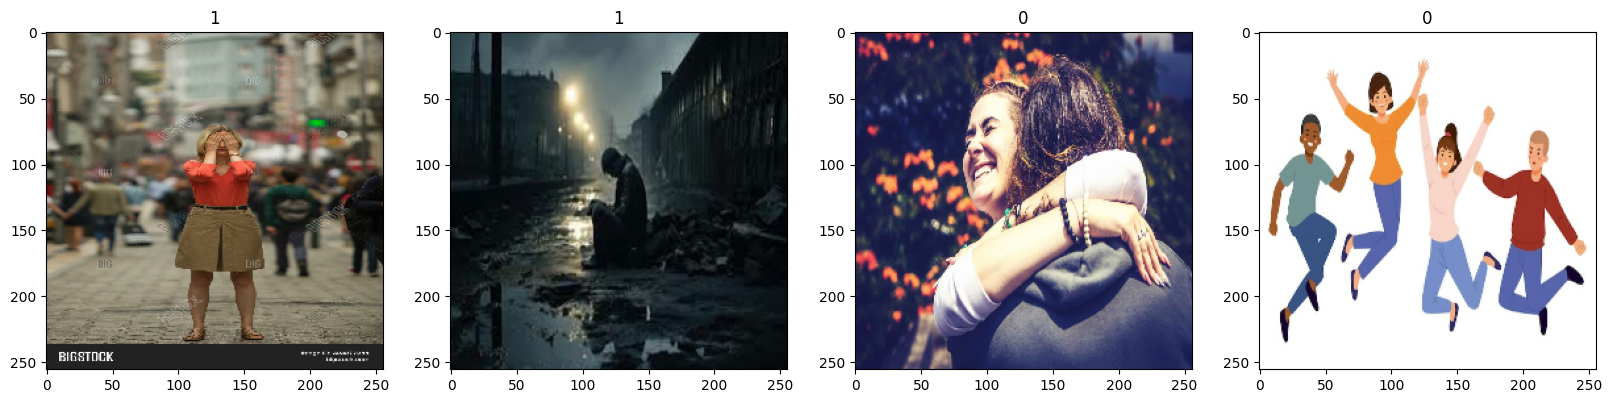

In [ ]:
fig ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#test and train data

In [ ]:
len(data)

22

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size,val_size,test_size)

15 4 3


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#BUILD MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
log_dir = 'logs'


In [ ]:
tensor_board_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensor_board_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - accuracy: 0.5614 - loss: 1.0009 - val_accuracy: 0.7500 - val_loss: 0.5414
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 668ms/step - accuracy: 0.7422 - loss: 0.5561 - val_accuracy: 0.8359 - val_loss: 0.4400
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.8181 - loss: 0.4334 - val_accuracy: 0.9141 - val_loss: 0.2426
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step - accuracy: 0.8635 - loss: 0.3297 - val_accuracy: 0.9219 - val_loss: 0.2418
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - accuracy: 0.9214 - loss: 0.2156 - val_accuracy: 0.9375 - val_loss: 0.1506
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 587ms/step - accuracy: 0.9469 - loss: 0.1452 - val_accuracy: 0.9375 - val_loss: 0.1865
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.9397 - loss: 0.1659 - val_accuracy: 0.9688 - val_loss: 0.1204
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.9738 - loss: 0.1043 - val_accuracy: 0

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

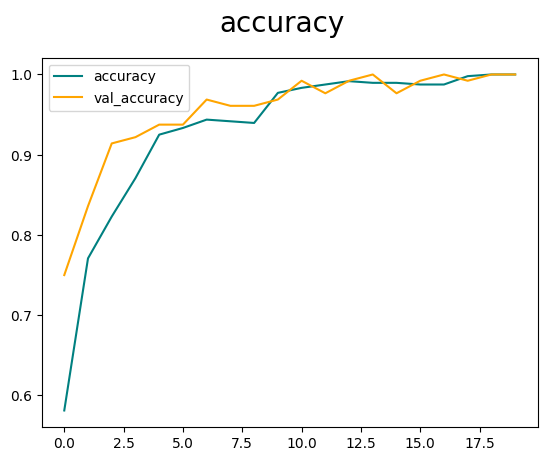

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

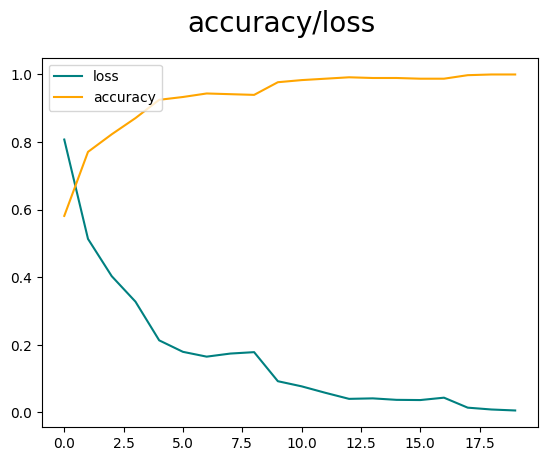

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['accuracy'],color='orange',label='accuracy')
fig.suptitle('accuracy/loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#TESTING DATA

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for i in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
print(f"Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}")

Precision:1.0,Recall:1.0,Accuracy:1.0


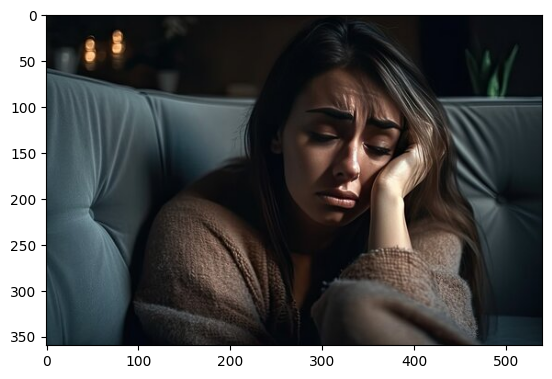

In [ ]:
# img = cv2.imread('/content/sample_data/happy/05-12-21-happy-people.jpg')


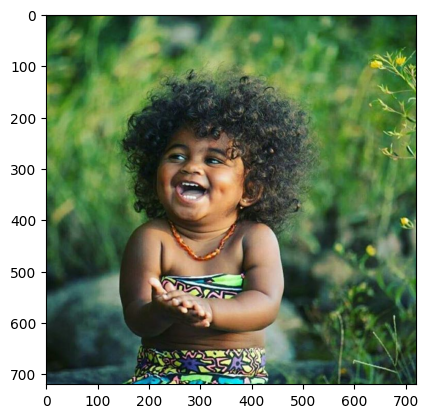

In [ ]:
img = cv2.imread('/content/sample_data/happy/8e06de1bf2171da2312b6de61c61e4bc.jpg')
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is Happy


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happy-sad-imageclassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models','happy-sad-imageclassifier.h5'))

In [ ]:
output = new_model.predict(np.expand_dims(resize/255,0))
if output > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class is Happy
